In [6]:
import bokeh.io
import bokeh.plotting
from bokeh.plotting import figure , output_file, show
from bokeh.sampledata.iris import flowers

In [3]:
#run this render your graph inside the jupyter notebook
bokeh.io.output_notebook()

Loading BokehJS ...

### Q1. How can you create a Bokeh plot using Python code?

In [7]:
output_file('test_bokeh.html')

#creating canvas
p = figure(title = 'test flower')
p.xaxis.axis_label = "petal_length"
p.yaxis.axis_label = "petal_width"
p.circle(flowers['petal_length'] , flowers['petal_width'])
show(p)

### Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.
**Glyphs** are nothing but visual shapes that are drawn to represent the data such as circles, squares, lines, rectangles, etc

In [8]:
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]

# create a plot
p = figure(
    title="Customized axes example",
    sizing_mode="stretch_width",
    max_width=500,
    height=350,
)

# add a renderer
p.circle(x, y, size=10)

# change some things about the x-axis
p.xaxis.axis_label = "Temp"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change some things about the y-axis
p.yaxis.axis_label = "Pressure"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"

# change things on all axes
p.axis.minor_tick_in = -3
p.axis.minor_tick_out = 6

# show the results
show(p)


### Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?
Bokeh server makes it easy to create interactive web applications that connect front-end UI events to running Python code. Bokeh creates high-level Python models, such as plots, ranges, axes, and glyphs, and then converts these objects to JSON to pass them to its client library

### Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?
ref: https://www.geeksforgeeks.org/responsive-chart-with-bokeh-flask-and-python/

In [4]:
import random
  
from flask import Flask, render_template
from bokeh.embed import components
from bokeh.plotting import figure
  
# Flask constructor
app = Flask(__name__)
  
# Root endpoint
@app.route('/')
def homepage():
  
    # First Chart - Scatter Plot
    p1 = figure(height=350, sizing_mode="stretch_width")
    p1.circle(
        [i for i in range(10)],
        [random.randint(1, 50) for j in range(10)],
        size=20,
        color="navy",
        alpha=0.5
    )
  
    # Second Chart - Line Plot
    language = ['Python', 'JavaScript', 'C++', 'C#', 'Java', 'Golang']
    popularity = [85, 91, 63, 58, 80, 77]
  
    p2 = figure(
        x_range=language,
        height=350,
        title="Popularity",
    )
    p2.vbar(x=language, top=popularity, width=0.5)
    p2.xgrid.grid_line_color = None
    p2.y_range.start = 0
  
    # Third Chart - Line Plot
    p3 = figure(height=350, sizing_mode="stretch_width")
    p3.line(
        [i for i in range(10)],
        [random.randint(1, 50) for j in range(10)],
        line_width=2,
        color="olive",
        alpha=0.5
    )
  
    script1, div1 = components(p1)
    script2, div2 = components(p2)
    script3, div3 = components(p3)
  
    # Return all the charts to the HTML template
    return render_template(
        template_name_or_list='charts.html',
        script=[script1, script2, script3],
        div=[div1, div2, div3],
    )
  
  
# Main Driver Function
if __name__ == '__main__':
    # Run the application on the local development server
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/May/2023 13:18:18] "GET / HTTP/1.1" 200 -


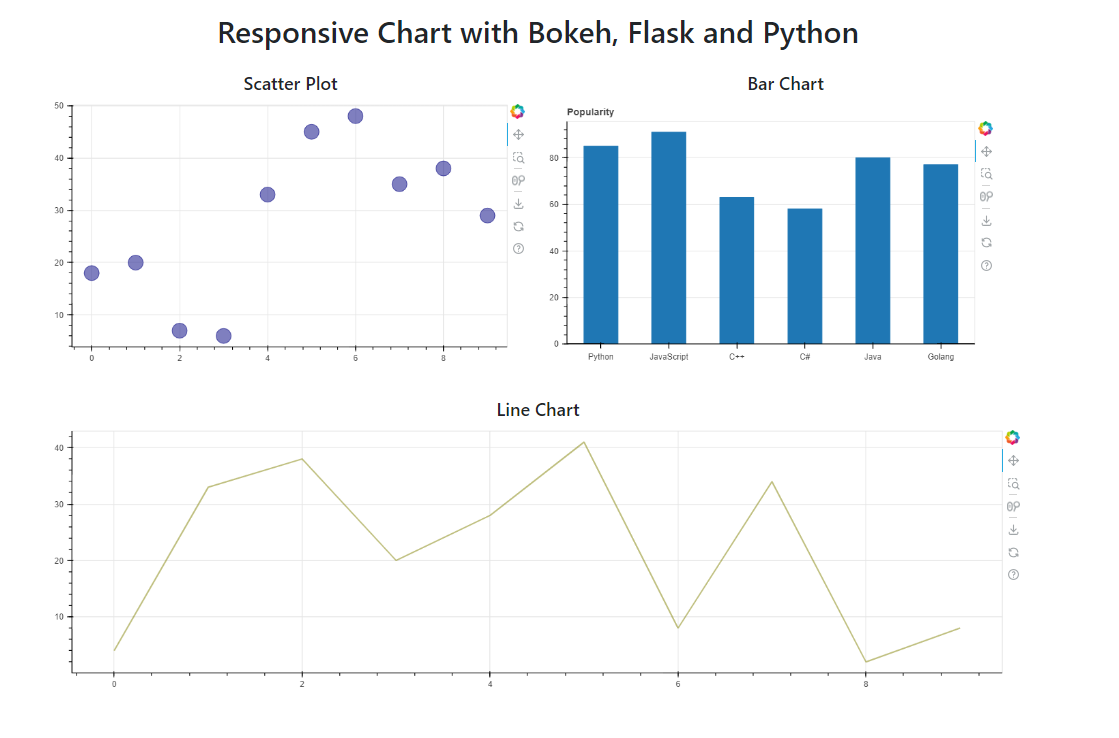